In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import datasets

## Linear Regression

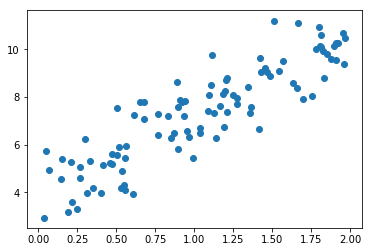

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

### Normal Equation

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.92351503],
       [3.26783147]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92351503],
       [10.45917797]])

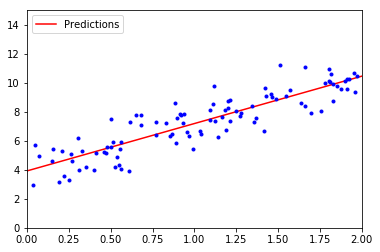

In [5]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left')
plt.show()

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92351503]), array([[3.26783147]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.92351503],
       [10.45917797]])

### Batch Gradient Descent

In [8]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[3.92351503],
       [3.26783147]])

### Stochastic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2, 1)

def learning_schedule(t):
    return t0/(t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
theta

array([[3.9532532],
       [3.3215253]])

In [11]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90259063]), array([3.24736863]))

## Polynomial Regression

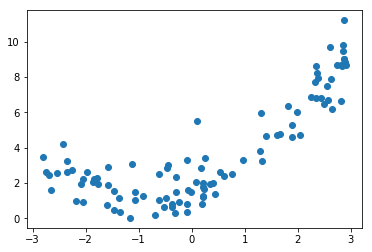

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [14]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.8226469])

In [15]:
X_poly[0]

array([1.8226469 , 3.32204171])

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78753732]), array([[0.99160325, 0.53161245]]))

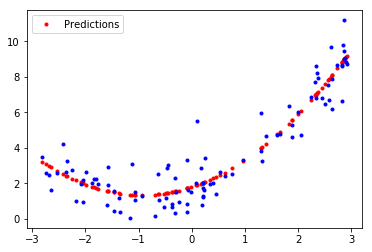

In [17]:
y_predict = lin_reg.predict(X_poly)

plt.plot(X, y_predict, 'r.', label="Predictions")
plt.plot(X, y, 'b.')
plt.legend(loc='upper left')
plt.show()

## Learning Curves

In [18]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")
    plt.legend(loc='upper right')

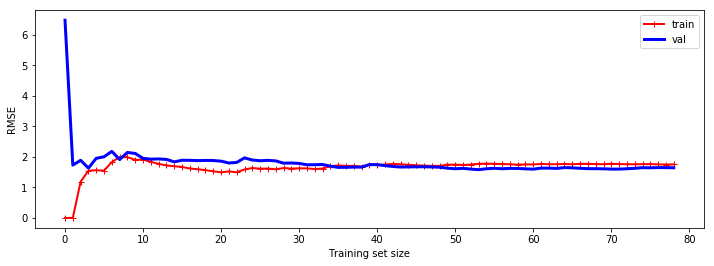

In [19]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.show()

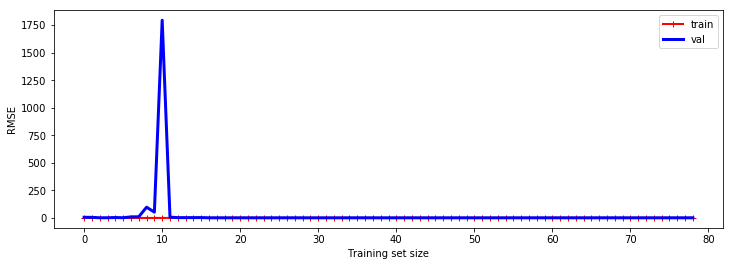

In [20]:
polynomial_regression = Pipeline(
    (
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    )
)

plot_learning_curves(polynomial_regression, X, y)
plt.show()

## Regularization

In [21]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.33808357]])

In [22]:
X_test = np.linspace(-3, 3, 20).reshape(-1, 1)

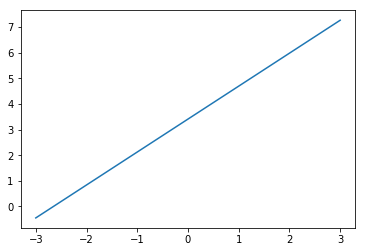

In [23]:
plt.plot(X_test, ridge_reg.predict(X_test))
plt.show()

In [24]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.30325352])

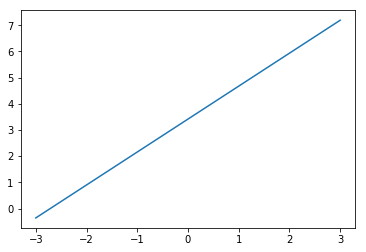

In [25]:
plt.plot(X_test, lasso_reg.predict(X_test))
plt.show()

In [26]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.29817166])

In [27]:
poly_trainsformer = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("scaler", StandardScaler())
))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

y_train = y_train.ravel()
y_val = y_val.ravel()

X_train_poly_scaled = poly_trainsformer.fit_transform(X_train)
X_val_poly_scaled = poly_trainsformer.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Decision Boundaries

In [28]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [29]:
X = iris["data"][:, 3:] # petal length
y = (iris["target"]==2).astype(np.int) # Iris Virginica

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

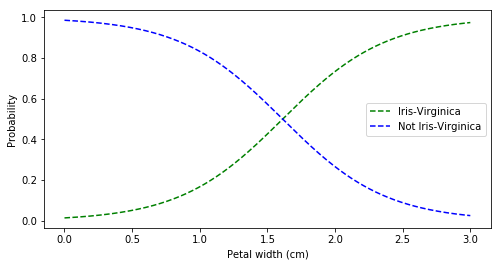

In [31]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 1], 'g--', label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc='best')
plt.show()

In [32]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

In [34]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
softmax_reg.predict([[5, 2]])

array([2])

In [36]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

## Excercises

Implement Batch Gradient Descent with early stopping for Softmax Regression

In [140]:
X_train, X_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [127]:
n_features = len(iris.feature_names)
k_classes = len(iris.target_names)
m = iris.data.shape[0]
Theta = np.random.rand(k_classes, n_features)

In [136]:
np.log(P)

array([[-0.14698362, -0.09616989, -0.56309577, -0.2058775 , -0.21562143,
        -0.93744953, -0.5721513 , -0.17645081, -0.16419453, -0.12425508],
       [-2.80251439, -3.25365635, -2.10266242, -2.55440424, -2.48264374,
        -1.83085218, -2.06039088, -2.71382773, -2.75057932, -2.98764335],
       [-2.57656777, -2.93637683, -1.1762743 , -2.2225852 , -2.20330559,
        -0.80274402, -1.1767283 , -2.34886595, -2.43574824, -2.71146533]])

In [154]:
y_pred, p_pred = softmax(X_train[0:10])
print(y_pred)
print(p_pred)
print(cross_entropy(y_train[0:10], p_pred))

[0 0 0 0 0 2 0 0 0 0]
[[0.86330812 0.90830969 0.56944347 0.81393277 0.80604038 0.39162539
  0.56431013 0.83824001 0.84857694 0.88315453]
 [0.06065735 0.03863269 0.12213083 0.07773853 0.08352212 0.16027692
  0.12740416 0.06628261 0.06389084 0.05040609]
 [0.07603452 0.05305762 0.3084257  0.1083287  0.11043749 0.44809768
  0.30828571 0.09547738 0.08753223 0.06643938]]
0.6095350195716315


In [134]:
def softmax(x):
    S_exp = np.exp(Theta.dot(x.T))
    P = S_exp/np.sum(S_exp, 0)
    return np.argmax(P, 0), P

In [152]:
def cross_entropy(y_true, p_pred):
    j = 0
    for m, y in enumerate(y_true):
        j += np.log(p_pred[y, m])
    return -j/len(y_true)